### Prophrt Model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [4]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx" )
df

,TYPE,Date,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2016-10-22,00:00:00,00:14:00,0.01,kWh,0.00,NaN
1,Electric usage,2016-10-22,00:15:00,00:29:00,0.01,kWh,0.00,NaN
2,Electric usage,2016-10-22,00:30:00,00:44:00,0.01,kWh,0.00,NaN
3,Electric usage,2016-10-22,00:45:00,00:59:00,0.01,kWh,0.00,NaN
4,Electric usage,2016-10-22,01:00:00,01:14:00,0.01,kWh,0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,2018-10-24,22:45:00,22:59:00,0.02,kWh,0.00,NaN
70364,Electric usage,2018-10-24,23:00:00,23:14:00,0.03,kWh,0.01,NaN
70365,Electric usage,2018-10-24,23:15:00,23:29:00,0.03,kWh,0.01,NaN
70366,Electric usage,2018-10-24,23:30:00,23:44:00,0.03,kWh,0.01,NaN


In [5]:
df['Date']

0       2016-10-22
1       2016-10-22
2       2016-10-22
3       2016-10-22
4       2016-10-22
           ...    
70363   2018-10-24
70364   2018-10-24
70365   2018-10-24
70366   2018-10-24
70367   2018-10-24
Name: Date, Length: 70368, dtype: datetime64[ns]

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
#df = df.rename(columns={"DATE": "ds", "USAGE": "y"})
df


,TYPE,Date,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2016-10-22,00:00:00,00:14:00,0.01,kWh,0.00,NaN
1,Electric usage,2016-10-22,00:15:00,00:29:00,0.01,kWh,0.00,NaN
2,Electric usage,2016-10-22,00:30:00,00:44:00,0.01,kWh,0.00,NaN
3,Electric usage,2016-10-22,00:45:00,00:59:00,0.01,kWh,0.00,NaN
4,Electric usage,2016-10-22,01:00:00,01:14:00,0.01,kWh,0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,2018-10-24,22:45:00,22:59:00,0.02,kWh,0.00,NaN
70364,Electric usage,2018-10-24,23:00:00,23:14:00,0.03,kWh,0.01,NaN
70365,Electric usage,2018-10-24,23:15:00,23:29:00,0.03,kWh,0.01,NaN
70366,Electric usage,2018-10-24,23:30:00,23:44:00,0.03,kWh,0.01,NaN


In [7]:
tarin_df = df.groupby("Date")["USAGE"].sum().reset_index()
tarin_df

,Date,USAGE
0,2016-10-22,4.52
1,2016-10-23,23.32
2,2016-10-24,7.16
3,2016-10-25,8.68
4,2016-10-26,5.04
...,...,...
728,2018-10-20,8.00
729,2018-10-21,1.12
730,2018-10-22,0.64
731,2018-10-23,1.20


In [8]:
train_df = tarin_df.rename(columns={"Date": "ds", "USAGE": "y"})
train_df

,ds,y
0,2016-10-22,4.52
1,2016-10-23,23.32
2,2016-10-24,7.16
3,2016-10-25,8.68
4,2016-10-26,5.04
...,...,...
728,2018-10-20,8.00
729,2018-10-21,1.12
730,2018-10-22,0.64
731,2018-10-23,1.20


In [89]:
model  = Prophet(changepoint_prior_scale=0.001,seasonality_mode='additive',seasonality_prior_scale=0.01)


model.fit(train_df)

16:25:56 - cmdstanpy - INFO - Chain [1] start processing
16:25:56 - cmdstanpy - INFO - Chain [1] done processing
16:25:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:25:56 - cmdstanpy - INFO - Chain [1] start processing
16:25:57 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
future = model.make_future_dataframe(periods=30)

In [91]:
forecast = model.predict(future)

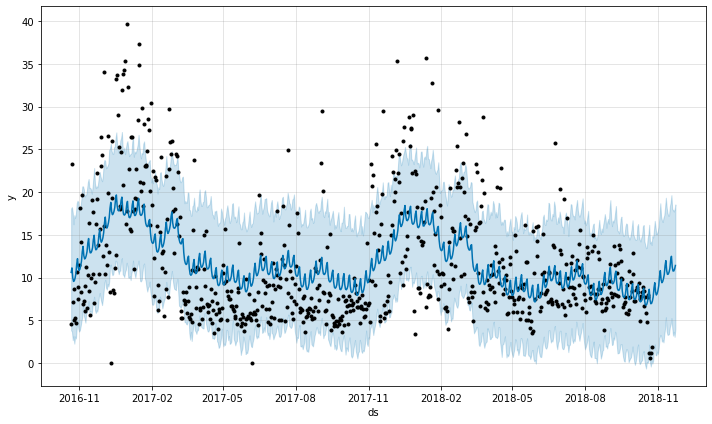

In [92]:
fig = model.plot(forecast)
plt.show()

In [93]:
# Display the forecast for the specified future dates
forcast_df=print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds       yhat  yhat_lower  yhat_upper
0   2016-10-22  10.605151    3.818005   18.101131
1   2016-10-23  11.133577    3.665411   18.251658
2   2016-10-24   9.967413    2.669320   17.584658
3   2016-10-25   9.546601    3.132250   16.239371
4   2016-10-26   9.639797    2.260555   17.308226
..         ...        ...         ...         ...
758 2018-11-19  11.264738    4.138708   18.001886
759 2018-11-20  10.769167    3.205541   17.942975
760 2018-11-21  10.773010    3.663231   17.726992
761 2018-11-22  10.990746    3.056490   18.005419
762 2018-11-23  11.415855    3.984679   18.564868

[763 rows x 4 columns]


In [94]:
print(forecast[['ds', ]])

            ds
0   2016-10-22
1   2016-10-23
2   2016-10-24
3   2016-10-25
4   2016-10-26
..         ...
758 2018-11-19
759 2018-11-20
760 2018-11-21
761 2018-11-22
762 2018-11-23

[763 rows x 1 columns]


In [95]:
# Filter rows where both yhat_lower and yhat_upper are positive
positive_interval_rows = forecast[(forecast['yhat_lower'] > 0) & (forecast['yhat_upper'] > 0)]

# Display the filtered DataFrame
positive_interval_rows

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-10-22,12.900103,3.818005,18.101131,12.900103,12.900103,-2.294951,-2.294951,-2.294951,0.754457,0.754457,0.754457,-3.049409,-3.049409,-3.049409,0.0,0.0,0.0,10.605151
1,2016-10-23,12.896894,3.665411,18.251658,12.896894,12.896894,-1.763317,-1.763317,-1.763317,1.202934,1.202934,1.202934,-2.966251,-2.966251,-2.966251,0.0,0.0,0.0,11.133577
2,2016-10-24,12.893686,2.669320,17.584658,12.893686,12.893686,-2.926273,-2.926273,-2.926273,-0.064113,-0.064113,-0.064113,-2.862159,-2.862159,-2.862159,0.0,0.0,0.0,9.967413
3,2016-10-25,12.890477,3.132250,16.239371,12.890477,12.890477,-3.343877,-3.343877,-3.343877,-0.606168,-0.606168,-0.606168,-2.737709,-2.737709,-2.737709,0.0,0.0,0.0,9.546601
4,2016-10-26,12.887269,2.260555,17.308226,12.887269,12.887269,-3.247472,-3.247472,-3.247472,-0.653497,-0.653497,-0.653497,-2.593975,-2.593975,-2.593975,0.0,0.0,0.0,9.639797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,2018-11-19,10.468066,4.138708,18.001886,10.468066,10.468066,0.796672,0.796672,0.796672,-0.064113,-0.064113,-0.064113,0.860785,0.860785,0.860785,0.0,0.0,0.0,11.264738
759,2018-11-20,10.464858,3.205541,17.942975,10.464858,10.464858,0.304309,0.304309,0.304309,-0.606168,-0.606168,-0.606168,0.910477,0.910477,0.910477,0.0,0.0,0.0,10.769167
760,2018-11-21,10.461649,3.663231,17.726992,10.461649,10.461649,0.311361,0.311361,0.311361,-0.653497,-0.653497,-0.653497,0.964858,0.964858,0.964858,0.0,0.0,0.0,10.773010
761,2018-11-22,10.458441,3.056490,18.005419,10.458441,10.458441,0.532305,0.532305,0.532305,-0.494645,-0.494645,-0.494645,1.026950,1.026950,1.026950,0.0,0.0,0.0,10.990746


In [96]:
# Filter rows where both yhat_lower and yhat_upper are positive
positive_interval_rows = forecast[(forecast['yhat_lower'] < 0) & (forecast['yhat_upper'] < 0)]


positive_interval_rows

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [97]:
from sklearn.metrics import mean_squared_error
# Extract actual values for the forecast period (assuming they are available)
actual_values = df[df['Date'] >= forecast['ds'].min()]['USAGE'].values

# Ensure lengths are consistent
if len(actual_values) >= len(forecast):
    # Trim actual values to match forecast length
    actual_values = actual_values[:len(forecast)]

    # Calculate metrics
    mse = mean_squared_error(actual_values, forecast['yhat'].values)
    rmse = np.sqrt(mse)

    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
else:
    print("Lengths of actual_values and forecast are inconsistent.")

Mean Squared Error (MSE): 142.79
Root Mean Squared Error (RMSE): 11.95


In [98]:
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
df_cv = cross_validation(model, initial='365 days', period='365 days', horizon = '30 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/1 [00:00<?, ?it/s]

16:26:07 - cmdstanpy - INFO - Chain [1] start processing
16:26:07 - cmdstanpy - INFO - Chain [1] done processing
16:26:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:26:07 - cmdstanpy - INFO - Chain [1] start processing
16:26:08 - cmdstanpy - INFO - Chain [1] done processing


In [99]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,4.469335,2.114080,1.625609,0.180223,0.183316,0.195839,1.000000
1,4 days,1.506430,1.227367,1.061495,0.135377,0.183316,0.136892,1.000000
2,5 days,1.091397,1.044700,0.742871,0.081086,0.035842,0.087663,1.000000
3,6 days,1.606677,1.267547,1.075590,0.109797,0.121976,0.118797,1.000000
4,7 days,8.633700,2.938316,2.123717,0.175312,0.121976,0.208214,1.000000
5,8 days,8.631569,2.937953,2.117203,0.175541,0.121976,0.208438,1.000000
6,9 days,8.099467,2.845956,1.745753,0.142166,0.021851,0.172344,1.000000
7,10 days,0.333162,0.577202,0.429278,0.052292,0.021851,0.054432,1.000000
8,11 days,0.489591,0.699708,0.612041,0.072336,0.081262,0.075697,1.000000
9,12 days,0.481338,0.693785,0.566788,0.065928,0.081262,0.069369,1.000000


In [100]:
# Calculate MAPE manually
df_cv['mape'] = np.abs((df_cv['y'] - df_cv['yhat']) / df_cv['y']) * 100
mape_mean = df_cv['mape'].mean()

print(f'Mean Absolute Percentage Error (MAPE): {mape_mean:.2f}%')

Mean Absolute Percentage Error (MAPE): 105.51%


In [87]:
import itertools
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross-validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_df)  # Fit model with given params
    df_cv = cross_validation(m, initial='365 days', period='30 days', horizon='30 days', parallel='processes')  # Use m instead of model
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

best_params = dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])


16:18:36 - cmdstanpy - INFO - Chain [1] start processing
16:18:36 - cmdstanpy - INFO - Chain [1] done processing
16:18:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:18:36 - cmdstanpy - INFO - Chain [1] start processing
16:18:37 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
16:18:48 - cmdstanpy - INFO - Chain [1] start processing
16:18:48 - cmdstanpy - INFO - Chain [1] done processing
16:18:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:18:49 - cmdstanpy - INFO - Chain [1] start processing
16:18:50 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
16:18:59 - cmdstanpy - INFO 

In [88]:
best_params

{'changepoint_prior_scale': 0.001,
 'seasonality_prior_scale': 0.01,
 'rmse': 5.804300606572054}

# LSTM

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])


In [103]:
df["START TIME"] = pd.to_timedelta(df["START TIME"].astype(str))

In [104]:

df["Datetime"] = df["Date"] + df["START TIME"]

In [105]:
# Extract relevant features
data = df[["Datetime", "USAGE"]].set_index("Datetime")


In [106]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [107]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append((seq, label))
    return np.array(sequences)


In [108]:
seq_length = 10
batch_size = 32
epochs = 20


In [109]:
sequences = create_sequences(data_scaled, seq_length)

C:\Users\Darshan\AppData\Local\Temp\ipykernel_14416\1587334098.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


In [110]:
X = np.array([seq for seq, _ in sequences])
y = np.array([label for _, label in sequences])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [112]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [113]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping], shuffle=False)

Epoch 1/20
1759/1759 [==============================] - 9s 4ms/step - loss: 0.0033 - val_loss: 4.7738e-04
Epoch 2/20
1759/1759 [==============================] - 8s 4ms/step - loss: 0.0024 - val_loss: 4.6201e-04
Epoch 3/20
1759/1759 [==============================] - 7s 4ms/step - loss: 0.0024 - val_loss: 4.6691e-04
Epoch 4/20
1759/1759 [==============================] - 8s 4ms/step - loss: 0.0023 - val_loss: 4.6658e-04
Epoch 5/20
1759/1759 [==============================] - 8s 4ms/step - loss: 0.0022 - val_loss: 4.6241e-04
Epoch 6/20
1759/1759 [==============================] - 7s 4ms/step - loss: 0.0021 - val_loss: 4.5428e-04
Epoch 7/20
1759/1759 [==============================] - 8s 4ms/step - loss: 0.0020 - val_loss: 4.4739e-04
Epoch 8/20
1759/1759 [==============================] - 8s 4ms/step - loss: 0.0020 - val_loss: 4.4188e-04
Epoch 9/20
1759/1759 [==============================] - 8s 4ms/step - loss: 0.0020 - val_loss: 4.3699e-04
Epoch 10/20
1759/1759 [=======================

In [114]:
# Make predictions for the next 30 days
last_sequence = data_scaled[-seq_length:]
next_predictions = []


In [115]:
for _ in range(30):
    next_pred = model.predict(np.array([last_sequence.reshape((seq_length, 1))]))
    next_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred)


1/1 [==============================] - 0s 21ms/step


In [116]:
# Inverse transform the predictions to the original scale
y_test_original = scaler.inverse_transform(np.array(next_predictions).reshape(-1, 1))

In [117]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_original, np.array(next_predictions).flatten()))


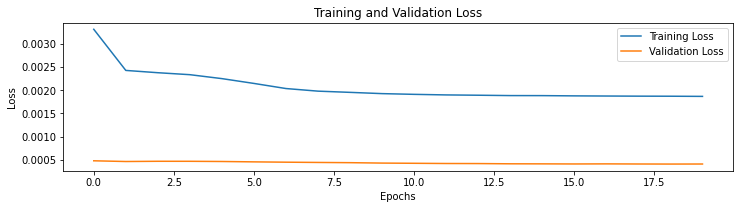

In [118]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Plot training and validation loss over epochs
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

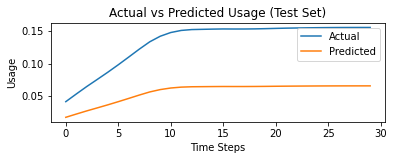

In [119]:
# Plot actual vs predicted usage for the test set
plt.subplot(2, 1, 2)
plt.plot(y_test_original, label='Actual')
plt.plot(np.array(next_predictions).flatten(), label='Predicted')  # Fix 'flatten()' here
plt.title('Actual vs Predicted Usage (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Usage')
plt.legend()


In [120]:
# Display the next 30 days predictions in column form
next_predictions_df = pd.DataFrame({'Date': pd.date_range(df['Date'].max() + pd.DateOffset(1), periods=30),
                                     'Predicted Usage': np.array(next_predictions).flatten()})
print(next_predictions_df)

# Display metrics
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

         Date  Predicted Usage
0  2018-10-25         0.017658
1  2018-10-26         0.022643
2  2018-10-27         0.027512
3  2018-10-28         0.032120
4  2018-10-29         0.036780
5  2018-10-30         0.041643
6  2018-10-31         0.046683
7  2018-11-01         0.051789
8  2018-11-02         0.056584
9  2018-11-03         0.060206
10 2018-11-04         0.062617
11 2018-11-05         0.063978
12 2018-11-06         0.064536
13 2018-11-07         0.064689
14 2018-11-08         0.064832
15 2018-11-09         0.064937
16 2018-11-10         0.064900
17 2018-11-11         0.064909
18 2018-11-12         0.064984
19 2018-11-13         0.065126
20 2018-11-14         0.065304
21 2018-11-15         0.065456
22 2018-11-16         0.065571
23 2018-11-17         0.065670
24 2018-11-18         0.065758
25 2018-11-19         0.065823
26 2018-11-20         0.065867
27 2018-11-21         0.065891
28 2018-11-22         0.065903
29 2018-11-23         0.065912
Root Mean Squared Error (RMSE): 0.08


### ARIMA & SARIMA

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [122]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])


In [123]:
data = df[["Date", "USAGE"]].set_index("Date")

In [124]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [125]:
order_arima = (5, 1, 0)  # Example order, you may need to tune this
arima_model = sm.tsa.ARIMA(train, order=order_arima)
arima_fit = arima_model.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [126]:
order_sarima = (1, 1, 1, 12)  # Example order, you may need to tune this
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [127]:
arima_pred = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
sarima_pred = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [128]:
mae_arima = mean_absolute_error(test, arima_pred)
mse_arima = mean_squared_error(test, arima_pred)
rmse_arima = sqrt(mse_arima)

mae_sarima = mean_absolute_error(test, sarima_pred)
mse_sarima = mean_squared_error(test, sarima_pred)
rmse_sarima = sqrt(mse_sarima)

print(f'ARIMA Metrics:')
print(f'Mean Absolute Error (MAE): {mae_arima:.2f}')
print(f'Mean Squared Error (MSE): {mse_arima:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_arima:.2f}')

print('\nSARIMA Metrics:')
print(f'Mean Absolute Error (MAE): {mae_sarima:.2f}')
print(f'Mean Squared Error (MSE): {mse_sarima:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_sarima:.2f}')

ARIMA Metrics:
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11

SARIMA Metrics:
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


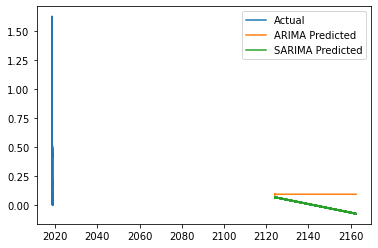

In [129]:
plt.plot(test, label='Actual')
plt.plot(arima_pred, label='ARIMA Predicted')
plt.plot(sarima_pred, label='SARIMA Predicted')
plt.legend()
plt.show()

### XGBoost model

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


In [131]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])


In [132]:
data = df[["Date", "USAGE"]].set_index("Date")


In [133]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [134]:
# Feature engineering: creating lag features
for i in range(1, 11):
    train[f'lag_{i}'] = train['USAGE'].shift(i)
    test[f'lag_{i}'] = test['USAGE'].shift(i)


C:\Users\Darshan\AppData\Local\Temp\ipykernel_14416\190463890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'lag_{i}'] = train['USAGE'].shift(i)
C:\Users\Darshan\AppData\Local\Temp\ipykernel_14416\190463890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'lag_{i}'] = test['USAGE'].shift(i)
C:\Users\Darshan\AppData\Local\Temp\ipykernel_14416\190463890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [135]:
train = train.dropna()
test = test.dropna()

In [136]:
X_train, y_train = train.drop("USAGE", axis=1), train["USAGE"]
X_test, y_test = test.drop("USAGE", axis=1), test["USAGE"]


In [137]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [138]:
mae_xgb = mean_absolute_error(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
rmse_xgb = sqrt(mse_xgb)


XGBoost Metrics:
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05


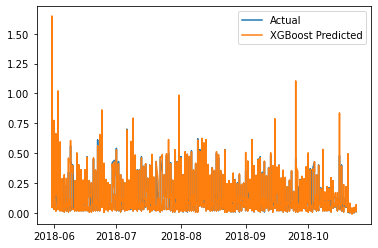

In [139]:
print(f'XGBoost Metrics:')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'Mean Squared Error (MSE): {mse_xgb:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')

# Visualize the results
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, xgb_pred, label='XGBoost Predicted')
plt.legend()
plt.show()


### VAR model

In [140]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [141]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")  # Replace with your file path
df["Date"] = pd.to_datetime(df["Date"])

In [142]:
df["START TIME"] = df["START TIME"].apply(lambda x: x.hour * 60 + x.minute)
df["END TIME"] = df["END TIME"].apply(lambda x: x.hour * 60 + x.minute)

In [143]:
data = df[["Date", "USAGE", "START TIME", "END TIME"]].set_index("Date")

In [144]:
result_adf_usage = adfuller(data["USAGE"])
print(f'ADF Statistic for USAGE: {result_adf_usage[0]}')
print(f'p-value: {result_adf_usage[1]}')

ADF Statistic for USAGE: -25.238587018974524
p-value: 0.0


In [145]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [146]:
model = VAR(train)
order_var = 2  # Example order, you may need to tune this
var_fit = model.fit(order_var)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [147]:
lag_order = var_fit.k_ar
var_pred = var_fit.forecast(train.values[-lag_order:], len(test))

In [148]:
mae_var = mean_absolute_error(test["USAGE"], var_pred[:, 1])  # Adjust index if needed
mse_var = mean_squared_error(test["USAGE"], var_pred[:, 1])
rmse_var = sqrt(mse_var)


VAR Metrics:
Mean Absolute Error (MAE): 712.10
Mean Squared Error (MSE): 507101.00
Root Mean Squared Error (RMSE): 712.11


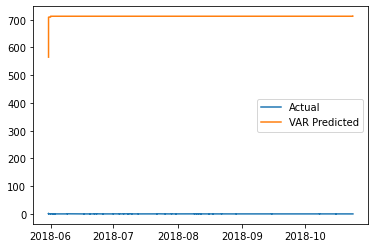

In [149]:
print(f'VAR Metrics:')
print(f'Mean Absolute Error (MAE): {mae_var:.2f}')
print(f'Mean Squared Error (MSE): {mse_var:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_var:.2f}')

# Visualize the results
plt.plot(test["USAGE"], label='Actual')
plt.plot(test.index, var_pred[:, 1], label='VAR Predicted')  # Adjust index if needed
plt.legend()
plt.show()

### Exponential Smoothing

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping


In [151]:
df = pd.read_excel(r"C:\Users\Darshan\Downloads\D202.xlsx")
df["Date"] = pd.to_datetime(df["Date"])


In [152]:
# Extract relevant features
data = df[["Date", "USAGE"]].set_index("Date")


In [153]:
data_resampled = data.resample('D').sum()# Downsample the data to daily frequency

In [154]:
train_size = int(len(data_resampled) * 0.8)
train, test = data_resampled.iloc[:train_size], data_resampled.iloc[train_size:]

In [155]:
model_es = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
fit_es = model_es.fit()


In [156]:
start_idx = test.index[0]
end_idx = test.index[-1]
pred_es = fit_es.predict(start=start_idx, end=end_idx) # Make predictions using integers for start and end


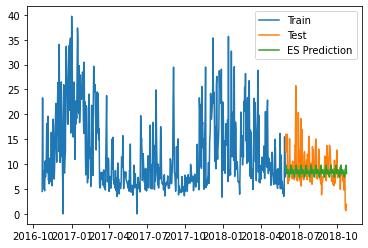

In [157]:
# Plot ES predictions
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred_es, label='ES Prediction')
plt.legend()
plt.show()


In [158]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_resampled)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append((seq, label))
    return np.array(sequences)

# Hyperparameters
seq_length = 10
batch_size = 32
epochs = 50

In [159]:
sequences = create_sequences(data_scaled, seq_length)

# Split into features and labels
X = np.array([seq for seq, _ in sequences])
y = np.array([label for _, label in sequences])


C:\Users\Darshan\AppData\Local\Temp\ipykernel_14416\689560677.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


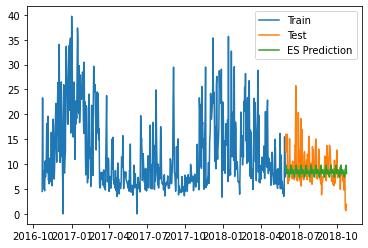

In [160]:
# Make predictions using integers for start and end
start_idx = test.index[0]
end_idx = test.index[-1]
pred_es = fit_es.predict(start=start_idx, end=end_idx)

# Plot ES predictions
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred_es, label='ES Prediction')
plt.legend()
plt.show()

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model_rnn = Sequential()
model_rnn.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                             validation_data=(X_test, y_test), callbacks=[early_stopping], shuffle=False)

Epoch 1/50
19/19 [==============================] - 3s 21ms/step - loss: 0.0674 - val_loss: 0.0081
Epoch 2/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0271 - val_loss: 0.0111
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.0072
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0229 - val_loss: 0.0080
Epoch 5/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0225 - val_loss: 0.0076
Epoch 6/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0224 - val_loss: 0.0075
Epoch 7/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0223 - val_loss: 0.0074
Epoch 8/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0222 - val_loss: 0.0074


5/5 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE) for LSTM: 3.38


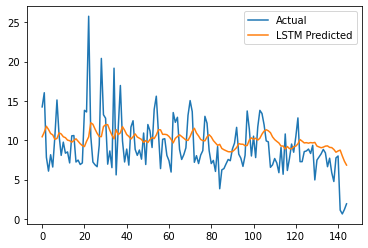

In [162]:
# Make LSTM predictions
predictions_rnn = model_rnn.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_rnn = scaler.inverse_transform(predictions_rnn)
y_test_original_rnn = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for LSTM
rmse_rnn = np.sqrt(mean_squared_error(y_test_original_rnn, predictions_rnn))
print(f'Root Mean Squared Error (RMSE) for LSTM: {rmse_rnn:.2f}')

# Visualize the results for LSTM
plt.plot(y_test_original_rnn, label='Actual')
plt.plot(predictions_rnn, label='LSTM Predicted')
plt.legend()
plt.show()